# This is a simple first version of a NN

Importing some stuff

In [75]:
import tensorflow as tf
import tensorflow.keras as ks
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
votes = pd.read_csv("../data/formatted/swissvotes_dataset_after_1900_utf8.csv", sep=';')
votes.head()

,anr,datum,titel_kurz_d,titel_kurz_f,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,rechtsform,...,ju_nein,ju_japroz,ju_annahme,bkresults_de,bkresults_fr,bfsmap_de,bfsmap_fr,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,56.0,20.05.1900,"Gesetz zur Kranken-, Unfall- und Militärversic...","Loi sur l'assurance maladie, accidents et mili...",Bundesgesetz betreffend die Kranken- und Unfal...,Loi fédérale sur l'assurance contre les maladi...,.,https://swissvotes.ch/vote/56.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19000520/...,https://www.bk.admin.ch/ch/f/pore/va/19000520/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
1,57.0,04.11.1900,Initiative «für die Proporzwahl des Nationalra...,Initiative pour l'introduction du système prop...,Volksinitiative «für die Proporzwahl des Natio...,Initiative populaire tendant à l'introduction ...,Erste Proporzinitiative,https://swissvotes.ch/vote/57.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
2,58.0,04.11.1900,Initiative für die Volkswahl des Bundesrates,Initiative pour la nomination du Conseil fédér...,Volksinitiative «für die Volkswahl des Bundesr...,Initiative populaire tendant à la nomination d...,.,https://swissvotes.ch/vote/58.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
3,59.0,23.11.1902,Unterstützung der Primarschule durch den Bund,Subvention de l'école primaire publique par la...,Bundesbeschluss betreffend die Unterstützung d...,Arrêté fédéral concernant la subvention de l'é...,.,https://swissvotes.ch/vote/59.00,1,1,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19021123/...,https://www.bk.admin.ch/ch/f/pore/va/19021123/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
4,60.0,15.03.1903,Zolltarifgesetz,Loi sur les tarifs douaniers,Bundesgesetz betreffend den schweizerischen Zo...,Loi fédérale sur le tarif des douanes,.,https://swissvotes.ch/vote/60.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19030315/...,https://www.bk.admin.ch/ch/f/pore/va/19030315/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.


In [3]:
votes.describe()

,anr,anzahl,rechtsform,d1e1,legislatur,bv_pos,nr_pos,sr_pos,dauer_abst,p_mitte,...,ne_japroz,ne_annahme,ge_berecht,ge_stimmen,ge_bet,ge_gultig,ge_ja,ge_nein,ge_japroz,ge_annahme
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.00000,618.000000,618.000000,618.000000,614.000000,...,601.000000,611.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,611.000000
mean,353.484951,2.925566,2.237864,6.202265,40.851133,1.37055,1.364078,1.367314,232.624595,9787.330619,...,50.790399,0.510638,164928.925125,69508.497504,40.838785,67188.848586,35156.594010,31975.271215,53.972413,0.554828
std,172.583841,1.648424,0.949310,3.409805,7.757916,0.50306,0.494840,0.495719,132.479098,1440.381553,...,21.123289,0.500296,75547.922047,41164.327665,12.770180,39868.282306,24834.557749,25894.567073,22.766392,0.497392
min,56.000000,1.000000,1.000000,1.000000,18.000000,1.00000,1.000000,1.000000,45.000000,1.000000,...,2.850000,0.000000,23836.000000,2963.000000,10.030000,2825.000000,61.000000,127.000000,0.320000,0.000000
25%,205.250000,2.000000,1.000000,3.000000,37.000000,1.00000,1.000000,1.000000,156.000000,9999.000000,...,34.090000,0.000000,69587.000000,27289.000000,32.310000,26302.000000,14239.000000,10041.000000,37.360000,0.000000
50%,351.500000,3.000000,2.000000,6.000000,43.000000,1.00000,1.000000,1.000000,213.500000,9999.000000,...,50.490000,1.000000,192460.000000,69234.000000,41.960000,67268.000000,31235.000000,25824.000000,52.720000,1.000000
75%,501.750000,4.000000,3.000000,10.000000,46.000000,2.00000,2.000000,2.000000,269.000000,9999.000000,...,66.980000,1.000000,217280.000000,106582.000000,49.420000,102307.000000,52484.000000,48675.000000,70.240000,1.000000
max,654.000000,9.000000,5.000000,12.000000,51.000000,3.00000,3.000000,3.000000,1118.000000,9999.000000,...,95.420000,1.000000,270580.000000,148309.000000,76.660000,146939.000000,122907.000000,118139.000000,99.450000,1.000000


# Data preprocessing

### in this version we prepare different kinds of data (numerical, party recommendations and categorical)

In [4]:
list(votes.columns)
parties = ["p_fdp", "p_svp", "p_glp", "p_sps", "br_pos"]
num_features = ["anr"] #not used yet
onehot_pre = ["dep"] #"rechtsform",
outcomes = ["volkja_proz"]
votes[outcomes].replace('.', np.nan)
votes[onehot_pre] = votes[onehot_pre][votes.dep != '.']
votes.dropna(subset = outcomes, inplace = True)
votes[onehot_pre].value_counts()

dep
3      151
5      124
6      110
2       94
7       72
4       31
1       22
8        6
dtype: int64

Data preparation vor party recommendations

In [5]:
votes['p_sps'].value_counts()

1     383
2     177
5      29
.      11
66      9
4       2
Name: p_sps, dtype: int64

Unknown party recommendations are changed into neutral. Recommendations other than yes or no are set to neutral. Yes is mapped to 1, no is mapped to -1, and neutral is 0. The data gets read as strings, so it needs to be converted.

In [6]:
df_parties = votes[parties].replace('.', 0)
df_parties.dropna(inplace=True)
for p in df_parties:
    df_parties[p] = df_parties[p].astype(int)
df_parties.head(1000)

,p_fdp,p_svp,p_glp,p_sps,br_pos
0,1,9999,9999,1,1
1,2,9999,9999,1,2
2,2,9999,9999,1,2
3,1,9999,9999,1,0
4,1,9999,9999,2,1
...,...,...,...,...,...
606,1,5,1,1,1
607,1,2,1,1,1
608,1,1,2,2,1
609,2,2,2,1,2


In [7]:
df_parties = df_parties.replace(2, -1)
df_parties = df_parties.replace([3, 4, 5, 66, 9999], 0)

print(f"before:{len(df_parties)}")
df_parties.dropna(inplace=True)
print(f"after:{len(df_parties)}")

df_parties['p_sps'].value_counts()

before:611
after:611


 1    383
-1    177
 0     51
Name: p_sps, dtype: int64

In [8]:
df_parties.shape

(611, 5)

In [9]:
votes["volkja_proz"] = votes["volkja_proz"].apply(lambda x: x/100)

Prepare Outcomes

In [23]:
df_outcomes = votes[outcomes]
for o in df_outcomes:
    df_outcomes[o] = votes[o].astype(float)
df_outcomes.head(1000)

C:\Users\togno\AppData\Local\Temp/ipykernel_19320/2197815607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outcomes[o] = votes[o].astype(float)


,volkja_proz
0,0.3021
1,0.4086
2,0.3504
3,0.7627
4,0.5959
...,...
606,0.6021
607,0.4841
608,0.5658
609,0.3512


Prepare Categorival values with onehot encoding

In [26]:
votes[onehot_pre].value_counts()
#no empty datapoints

dep
3      151
5      124
6      110
2       94
7       72
4       31
1       22
8        6
dtype: int64

In [30]:
#convert to int and make tf.onehot tensor
#then reduce dimension and convert to np_array

for o in onehot_pre:
    votes[o] = votes[o].astype(float)

onehot_tensor = tf.one_hot(votes[onehot_pre],8).numpy()
print(onehot_tensor)
onehot_np = np.squeeze(onehot_tensor)
print(onehot_np.ndim)
print(onehot_np)
onehot_np.shape


[[[0. 0. 0. ... 0. 1. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
2
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(611, 8)

In [31]:
#convert onehot to pd dataframe with same index as parties
df_onehot = pd.DataFrame(onehot_np, columns = ['EDA','EDI','EJPD','VBS','EFD','WBF','UVEK','BK'], index = votes[parties].index)
print(df_onehot.head(1000))

     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK
0    0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0
1    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
2    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
3    0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0
4    0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
..   ...  ...   ...  ...  ...  ...   ...  ...
606  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0
607  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0
608  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0
609  0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
610  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0

[611 rows x 8 columns]


Create test and train split

In [32]:
from sklearn.model_selection import train_test_split

in_train, in_test, out_train, out_test = train_test_split(df_onehot, df_outcomes, test_size=0.2)
print(in_test)
print(out_test)

     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK
193  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0
393  0.0  0.0   0.0  0.0  1.0  0.0   0.0  0.0
603  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0
79   0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
70   0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0
..   ...  ...   ...  ...  ...  ...   ...  ...
8    0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0
38   0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
139  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0
459  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0
49   0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0

[123 rows x 8 columns]
     volkja_proz
193       0.3419
393       0.8218
603       0.5165
79        0.3763
70        0.9159
..           ...
8         0.7035
38        0.1296
139       0.7518
459       0.3765
49        0.4014

[123 rows x 1 columns]


## NN
The neural net will have 2 hidden layers to start with. 20 and 10 nodes each. The optimizer is gradient descent, and the metrics are mean squared error.

In [72]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [80]:
def create_model(my_learning_rate, my_feature_layer):
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(tf.keras.layers.Dense(units=my_feature_layer, 
                                  activation='relu', 
                                  name='Hidden1'))
  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Input'))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  
  # Define the output layer.
  
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

In [78]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""
  history = model.fit(x=in_train, y=out_train, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Epoch 1/50
20/20 [==============================] - 1s 3ms/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 10/50
20/20 [=========

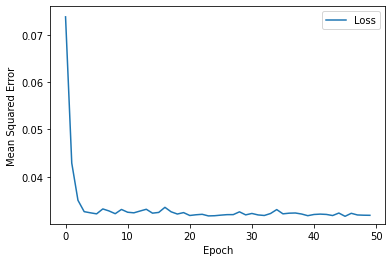


 Evaluate the new model against the test set:
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - mean_squared_error: 0.0178


[0.017811164259910583, 0.017811164259910583]

In [86]:
# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 50
batch_size = 25

# Specify the label
label_name = "vote outcome"

# Establish the model's topography.
my_model = create_model(learning_rate, len(in_train))

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, in_train, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = in_test, y = out_test, batch_size=batch_size)

In [87]:
out_predict = model.predict(in_test)
out_comparison = out_test
out_comparison["pred"] = out_predict
print(out_comparison)

     volkja_proz      pred
193       0.3419  0.522924
393       0.8218  0.448861
603       0.5165  0.518822
79        0.3763  0.529124
70        0.9159  0.482446
..           ...       ...
8         0.7035  0.522924
38        0.1296  0.529124
139       0.7518  0.495085
459       0.3765  0.495085
49        0.4014  0.495085

[123 rows x 2 columns]


Using mean squared error on the predicted values

In [88]:
res = 0
for real, pred in zip(out_comparison["volkja_proz"], out_comparison["pred"]):
    res += abs(real-pred)
res /= len(out_test)

print(f"The NN has an error of {res}")

The NN has an error of 0.1598859192154272
